## The BCM Rule

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>


$$
\begin{equation}
\tau_{w}\frac{d\mathbf{w}}{dt} = v\mathbf{u}(v-\theta_{v})
\end{equation}
$$


$$
\begin{equation}
\tau_{\theta}\frac{d\theta_{v}}{dt} = v^2 - \theta_{v}
\end{equation}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.magic import magic
from scipy import linalg

T = 2.50

dt = 0.001
w = np.array([0.1,0.2, 0.1, 0.2, 0.1,0.1,0.1,0.05, 0.05, 0.05], dtype='float64')
# u = np.array([1,2,1,0,1,2,3,4,2,1], dtype='float64')
u = np.array([-1., -2., -1., 4., -1., -2., -3., -4., -2., -1.], dtype='float64')
r = np.random.rand(10,)

t = np.arange(0, T, dt)

tau_w, tau_theta = 2, 0.001
theta = 3

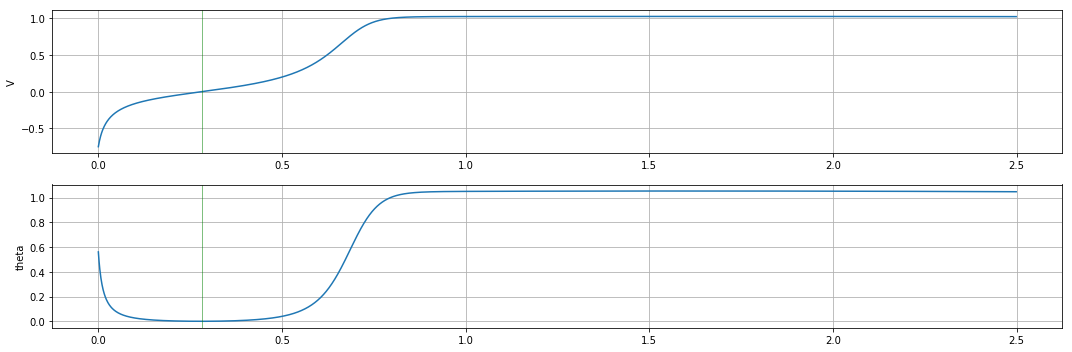

In [2]:
V, THETA = [], []

for i in range(len(t)):
    u += 0.001 * r
    v = np.dot(u,w)
    V.append(v)
    dtheta = (v**2 - theta)/tau_theta*dt
    theta += dtheta
    THETA.append(theta)
    dw = v*u*(v-theta)/tau_w*dt
#     dw = 0.001*np.dot(np.outer(u,u), w)
    w += dw
    
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(t,V)
plt.ylabel('V')
plt.grid()
plt.axvline(t[np.argmin(np.abs(V))], color='green', linewidth=0.5)

plt.subplot(2,1,2)
plt.ylabel('theta')
plt.plot(t,THETA)
plt.grid()

plt.axvline(t[np.argmin(np.abs(V))], color='green', linewidth=0.5)


plt.tight_layout()

## Multiplicative Normalization and the Oja Rule


$$
\boxed{
\tau_{w}\frac{d\mathbf{w}}{dt} = v\mathbf{u} - \alpha v^2\mathbf w
}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

T = 2.50

dt = 0.01
w = np.array([0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05], dtype='float64')
u1 = np.array([-1 , -2, -1  , 4,    -1,   2,  -3,   -4,   -2,   -1], dtype='float64')
u2 = np.random.randn(10,)
v0 = 10
t = np.arange(0, T, dt)
alpha = 0.02

tau_w = 2

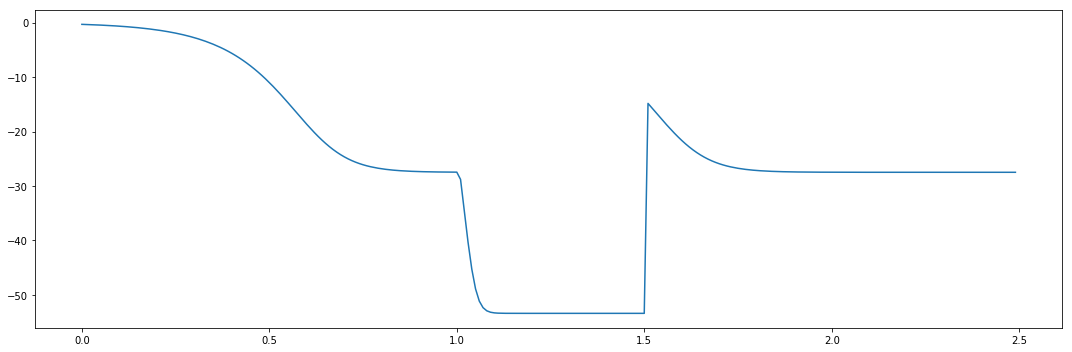

In [4]:
V = []
D = []
u = u2
for i in range(len(t)):
    
    if t[i] > 1:
        u = u1
    if t[i] > 1.5:
        u = u2
    v = np.dot(w,u)
    V.append(v)
    dw = (v*u - alpha * v**2 * w) / tau_w * dt
    w += dw
    D.append(np.sum(np.abs(dw/dt)))

    
plt.figure(figsize=(15,5))
plt.plot(t, V)
# plt.plot(t, D)


plt.tight_layout()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

T = 5.50
dt = 0.01
alpha = 0.1
tau_w = 0.4 # the less tau is, the faster w grows
batch = 5

mean, cov = (0, 0), np.array([[ 1.30163034, -1.11027617], [-1.11027617,  1.32507716]])
t = np.arange(0, T, dt)

We'll run simulations using **four** slightly different weight update rules (Types):
$$
\begin {equation}
\tau_w \frac{d\mathbf{w}}{dt} = \mathbf{Cw}
\end {equation}
$$
where $\mathbf{C} = \langle \mathbf{uu} \rangle - {\langle \mathbf{u} \rangle}^2 = \operatorname {E} [\mathbf {u} \mathbf {u} ^{T}]- \operatorname {E}{[\mathbf{u}]}^2 $ = `cov(u)`


$$
\begin {equation}
\tau_w \frac{d\mathbf{w}}{dt} = \mathbf{Cw} - \alpha v^2 w
\end {equation}
$$

$$
\begin {equation}
\tau_w \frac{d\mathbf{w}}{dt} = v \langle \mathbf{u} \rangle - \alpha v^2 w
\end {equation}
$$

$$
\begin {equation}
\tau_w \frac{d\mathbf{w}}{dt} = v \langle \mathbf{u} \rangle
\end {equation}
$$

where $v = \langle \mathbf{u}\rangle \mathbf{w}$

(1) - **covariance rule**

(2) - **covariance rule** with Oja rule to prevent unlimited growth of the length of $\mathbf{w}$

(3) - **Basic Hebb rule** with Oja rule to prevent unlimited growth of the length of $\mathbf{w}$


In [32]:
def run_sim(T, t, dt, alpha, tau_w, batch, cov, w, Type=1):
    U, ang, W = [], [], []
    for i in t:
        # we take a batch of input patterns (u) taken from a multivariate normal distribution:
        u = np.random.multivariate_normal(mean, cov, (batch,))
        # produce an average output evoked by the patterns in the batch:
        # critically, v is assumed to stay constant over the patterns in one batch
        v = np.mean(w.reshape(2,1).T.dot(u.T))
        C = np.cov(u.T)
        U.append(u)
        W.append(np.linalg.norm(w))

        if Type==1:
            # here the norm of the w vector is can grow without bound (Covariance Rule):
            dw = (np.dot(C,w))/tau_w*dt  # Eq. 8.10 (see eq. 1 above)
        if Type==2:
            # the norm of vector w is bounded (Covariance Rule). The more v becomes, the slower w changes.
            # Bounded Covariance Rule (Oja Rule):
            dw = (np.dot(C,w) - alpha * v**2 * w)/tau_w*dt
        if Type==3:
            dw = (v*np.mean(u, axis=0) - alpha * v**2 * w)/tau_w*dt
        if Type==4:
            dw = (v*np.mean(u, axis=0))/tau_w*dt

        w += dw
        ang.append(np.arctan(w[0]/w[1])/np.pi*180)
    u = np.vstack(U)
    U,_,_ = np.linalg.svd(u.T)

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.scatter(u[:,0], u[:,1])
    plt.plot([0, U[0,0]], [0, U[1,0]], linewidth=3, color='red')
    plt.plot([0, w[0]], [0, w[1]], linewidth=1, color='yellow')
    plt.grid()

    plt.subplot(1,3,2)
    plt.plot(t,ang)
    plt.ylabel('Angle of w, degrees')
    plt.grid()

    plt.subplot(1,3,3)
    plt.plot(t, W)
    plt.ylabel('${|\mathbf{w}|}^2$')

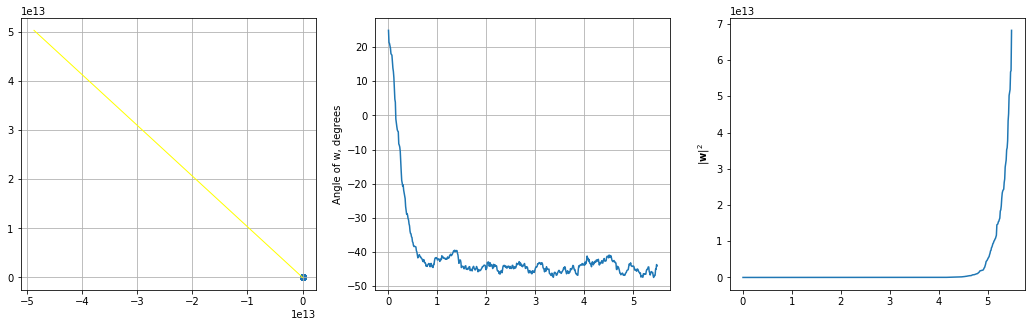

In [34]:
w = np.random.rand(2,)
run_sim(T, t, dt, alpha, tau_w, batch, cov, w, Type=1)

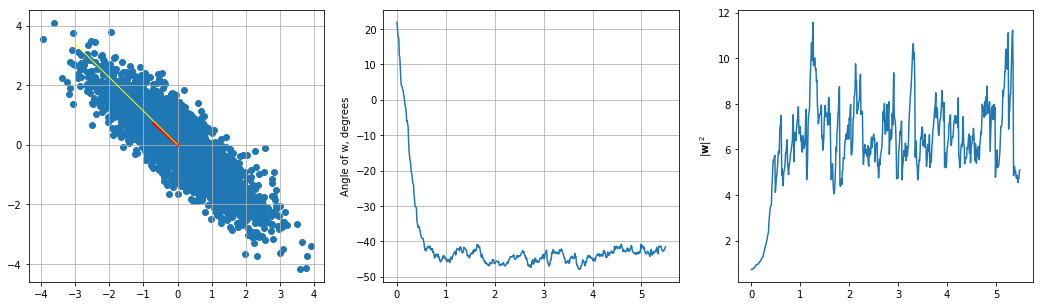

In [35]:
w = np.random.rand(2,)
run_sim(T, t, dt, alpha, tau_w, batch, cov, w, Type=2)

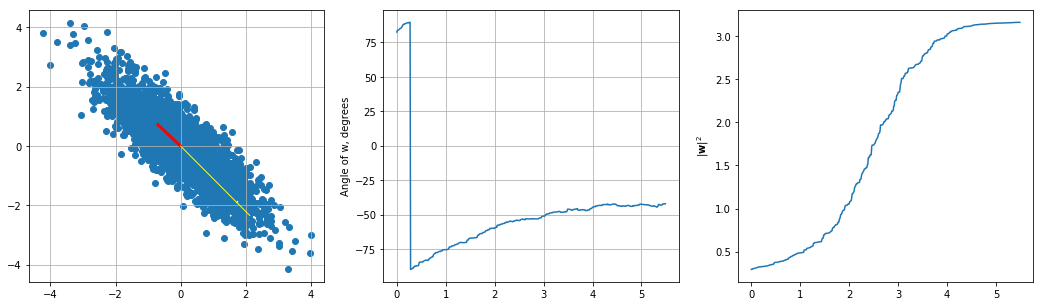

In [36]:
w = np.random.rand(2,)
run_sim(T, t, dt, alpha, tau_w, batch, cov, w, Type=3)

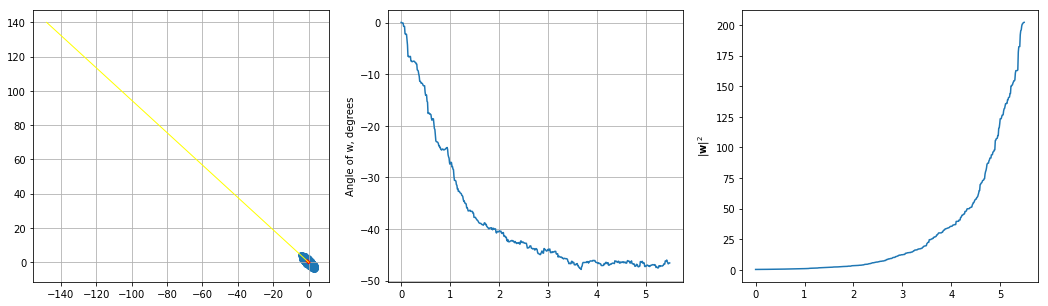

In [37]:
w = np.random.rand(2,)
run_sim(T, t, dt, alpha, tau_w, batch, cov, w, Type=4)